In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(len(df))
print("Iris Dataset:")
print(df.head())

150
Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## HISTOGRAM

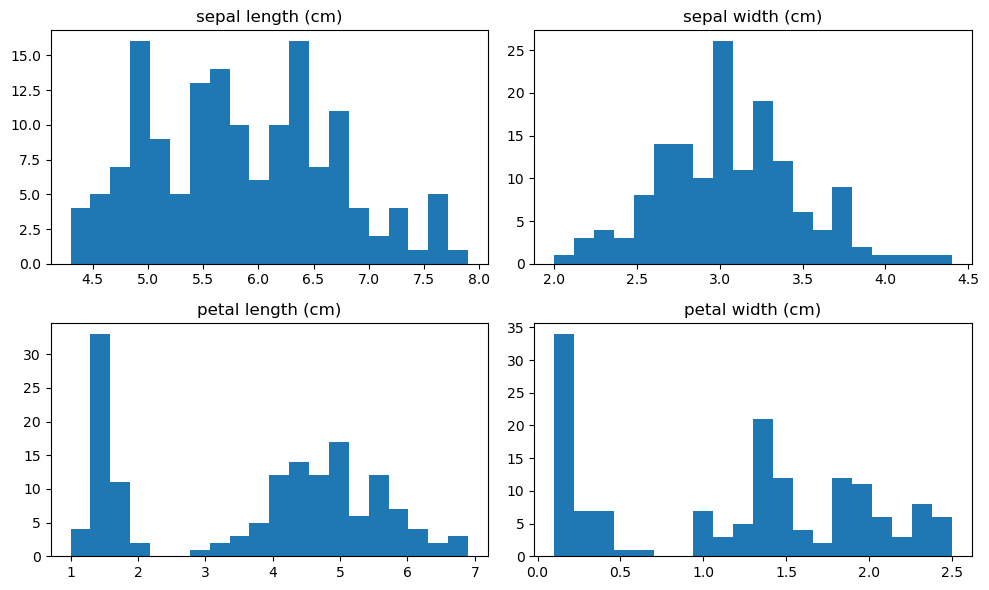

In [3]:
# Plot histograms for each feature
plt.figure(figsize=(10,6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(df.iloc[:, i], bins=20)
    plt.title(iris.feature_names[i])
plt.tight_layout()
plt.show()

### Box Plots: Plot box plots for each feature to visualize the median and quartiles.

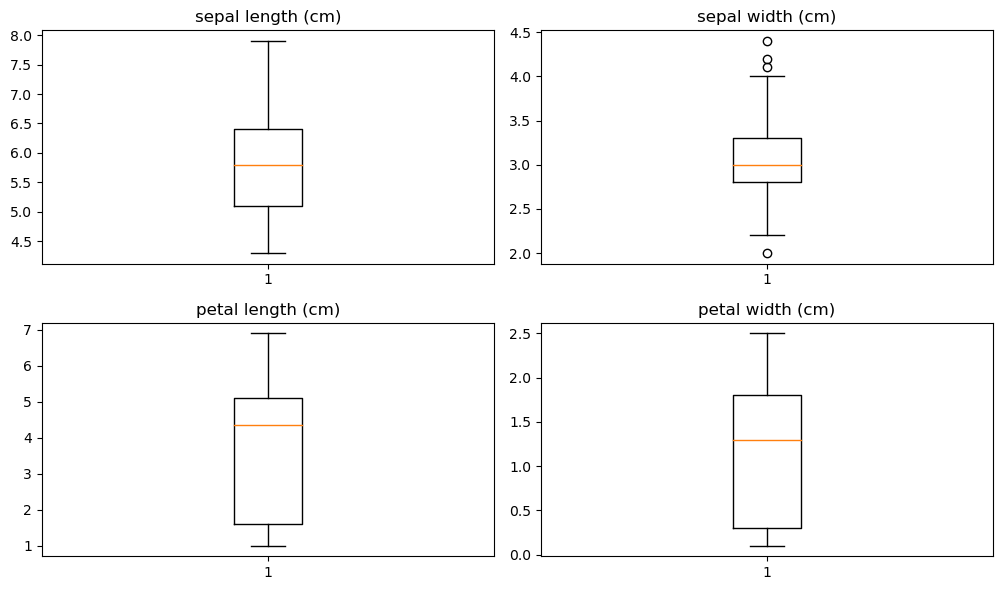

In [ ]:
# Plot box plots for each feature
plt.figure(figsize=(10,6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.boxplot(df.iloc[:, i])
    plt.title(iris.feature_names[i])
plt.tight_layout()
plt.show()

### Scatter Plots: Plot scatter plots for each pair of features to visualize correlations.

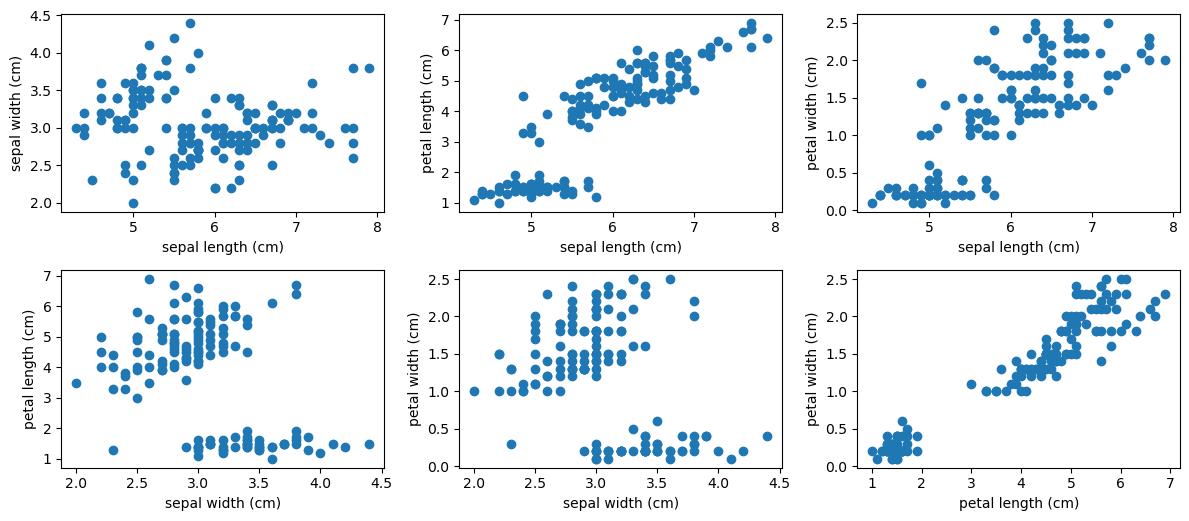

In [5]:
# Plot scatter plots for each pair of features
from itertools import combinations

features = iris.feature_names
combs = list(combinations(features, 2))

plt.figure(figsize=(12,10))
for i, comb in enumerate(combs):
    plt.subplot(4, 3, i+1)
    plt.scatter(df[comb[0]], df[comb[1]])
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
plt.tight_layout()
plt.show()

## HANDLING MISSING VALUES

### For demonstration purposes, let's introduce some missing values into the dataset.

In [6]:
# Introduce missing values
import numpy as np
df.loc[10:15, 'sepal length (cm)'] = np.nan

print("Dataset with missing values:")
print(df.head(20))

Dataset with missing values:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                NaN               3.7                1.5               0.2   
11         

In [7]:
# Detect missing values
missing_values = df.isnull().sum()
print("Missing values count:")
print(missing_values)

Missing values count:
sepal length (cm)    6
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [8]:
# Impute missing values with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Dataset after mean imputation:")
print(df_imputed.head(20))

Dataset after mean imputation:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            5.100000               3.5                1.4               0.2   
1            4.900000               3.0                1.4               0.2   
2            4.700000               3.2                1.3               0.2   
3            4.600000               3.1                1.5               0.2   
4            5.000000               3.6                1.4               0.2   
5            5.400000               3.9                1.7               0.4   
6            4.600000               3.4                1.4               0.3   
7            5.000000               3.4                1.5               0.2   
8            4.400000               2.9                1.4               0.2   
9            4.900000               3.1                1.5               0.1   
10           5.872917               3.7                1.5               0.2   
11       

In [9]:
# Apply Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

print("Dataset after Min-Max scaling:")
print(df_scaled_minmax.head())

Dataset after Min-Max scaling:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.200000          0.625000           0.067797          0.041667   
1           0.142857          0.416667           0.067797          0.041667   
2           0.085714          0.500000           0.050847          0.041667   
3           0.057143          0.458333           0.084746          0.041667   
4           0.171429          0.666667           0.067797          0.041667   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [10]:
# Correlation analysis
corr_matrix = df_imputed.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.104855           0.843247   
sepal width (cm)           -0.104855          1.000000          -0.428440   
petal length (cm)           0.843247         -0.428440           1.000000   
petal width (cm)            0.787474         -0.366126           0.962865   
target                      0.757052         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.787474  0.757052  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


In [11]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_imputed), columns=['PC1', 'PC2'])

print("Dataset after PCA:")
print(df_pca.head())

Dataset after PCA:
        PC1       PC2
0 -2.878250  0.237788
1 -2.901336 -0.228156
2 -3.061784 -0.236258
3 -2.924506 -0.393595
4 -2.918223  0.228663
